In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
# import the necessary packages

In [4]:
ads = pd.read_csv('Advertising.csv') # read the dataset

In [5]:
ads.head() # head(), will give first five rows the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
ads.shape # will tell about the rows and columns of the dataset

(200, 5)

In [30]:
ads.columns # will list all the variables of the dataset.

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

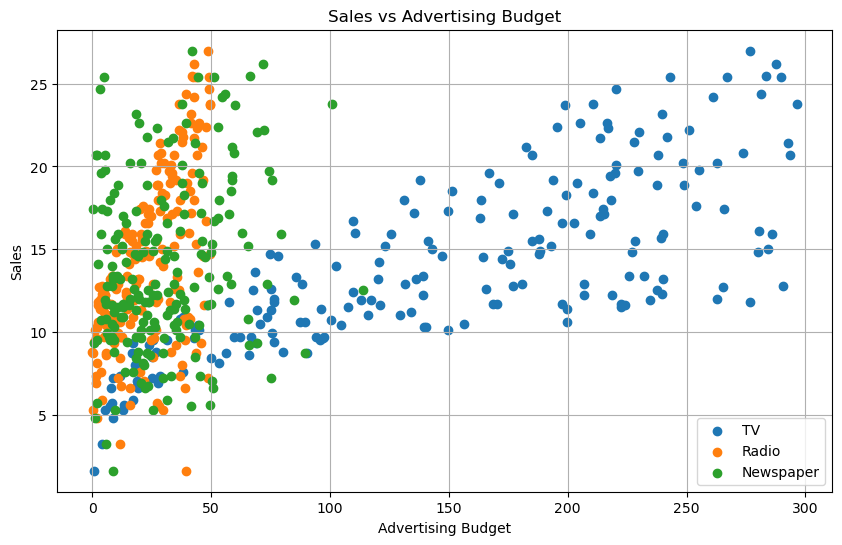

In [35]:
import matplotlib.pyplot as plt

# Assuming ads is your DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot with TV vs sales
plt.scatter(ads['TV'], ads['sales'], label='TV')

# Scatter plot with radio vs sales
plt.scatter(ads['radio'], ads['sales'], label='Radio')

# Scatter plot with newspaper vs sales
plt.scatter(ads['newspaper'], ads['sales'], label='Newspaper')

plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales vs Advertising Budget')
plt.grid(True)
plt.show()
# for multiple regression we need to mention the independent variables differently with the dependent variables


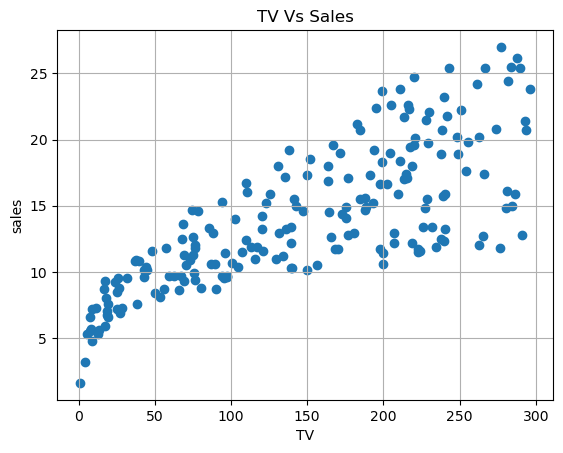

In [38]:
plt.scatter(ads['TV'], ads['sales'])
plt.title('TV Vs Sales')
plt.xlabel('TV')
plt.ylabel('sales')
plt.grid(True)
plt.show()

In [47]:
X = ads[['TV', 'radio', 'newspaper']]  # Features
y = ads['sales']                        # Target variable
# defining our X and y

In [48]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)

In [58]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("R2 score", r2_score(y_test, y_pred))


MAE 1.1986992501928753
MSE 2.1537819056615657
R2 score 0.9138375011080567


In [60]:
lr.coef_

array([0.04552917, 0.18512403, 0.00119881])

In [61]:
lr.intercept_

2.9109808628541796

In [64]:
import statsmodels.api as sm

In [65]:
y = ads['sales']

X = ads[['TV', 'radio', 'newspaper']]

X_with_intercept = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_intercept)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.58e-96
Time:                        00:35:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""